
# Can we perform meaningful sentiment analyses on cannabis strain descriptions (TextBlob, Vader)?

In [140]:
# GENERAL
import numpy as np
import pandas as pd

# NLP
import spacy
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# GRAPHICS
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
# LOAD NLP MODEL
nlp = spacy.load('en_core_web_lg')

In [22]:
# LOAD DATAFRAME
# df_raw = pd.read_csv('data/df_strain_me_v2.csv', encoding = "ISO-8859-1")
df_raw = pd.read_csv('data/df_strain_me_v2.csv', encoding = "UTF-8")

In [23]:
# Create df for sentiment analysis
cols = ['strain', 'cluster', 'lean', 'Rating', 'strain_type', 'Strain_description']
df = df_raw[cols]
df.columns = ['Strain', 'Cluster', 'Lean', 'Rating', 'Strain_type', 'Strain_description'] # Rename columns
df.index = df['Strain']
df.head()

,Strain,Cluster,Lean,Rating,Strain_type,Strain_description
Strain,,,,,,
$100 OG,$100 OG,0,0.50,3.980556,hybrid,$100 OG is a 50/50 hybrid strain that packs a ...
'98 Aloha White Widow,'98 Aloha White Widow,2,0.57,4.666667,hybrid,The 98 Aloha White Widow is an especially pot...
1024,1024,0,0.30,4.422222,sativa,1024 is a sativa-dominant hybrid bred in Spain...
13 Dawgs,13 Dawgs,0,0.50,4.000000,hybrid,13 Dawgs is a hybrid of G13 and Chemdawg genet...
22,22,0,0.54,3.857143,hybrid,22 is a Jack Herer cross from Cali Connection....


## 1. Textblob
References:
- https://textblob.readthedocs.io/en/dev/quickstart.html#sentiment-analysis
- https://medium.com/@dim.wael/how-to-build-your-own-twitter-sentiment-analysis-system-in-python-e5139b440445

In [24]:
# SAMPLE Strain_description
strain_description = df['Strain_description'][0]

In [25]:
# CHECK Strain_description FOR A SPECIFIC STRAIN
str(df[df['Strain'] == 'Blue Dream'].Strain_description.values)

"['Blue Dream, a sativa-dominant hybrid originating in California, has achieved legendary status among West Coast strains. Crossing a Blueberry indica with the sativa Haze, Blue Dream balances full-body relaxation with gentle cerebral invigoration. Novice and veteran consumers alike enjoy the level effects of Blue Dream, which ease you gently into a calm euphoria. Some Blue Dream phenotypes express a more indica-like look and feel, but the sativa-leaning variety remains most prevalent.\\rWith a sweet berry aroma redolent of its Blueberry parent, Blue Dream delivers swift symptom relief without heavy sedative effects. This makes Blue Dream a popular daytime medicine for patients treating pain, depression, nausea, and other ailments requiring a high THC strain.']"

In [26]:
description = TextBlob(strain_description)

In [28]:
print(description)
print("\n", description.translate(to='fr')) # TRANSLATE INTO FRENCH (FOR FUN)

$100 OG is a 50/50 hybrid strain that packs a strong punch. The name supposedly refers to both its strength and high price when it first started showing up in Hollywood. As a plant, $100 OG tends to produce large dark green buds with few stems. Users report a strong body effect of an indica for pain relief with the more alert, cerebral feeling thanks to its sativa side.

 100 $ OG est une variété hybride 50/50 qui a du punch. Le nom fait référence à la fois à sa force et à son prix élevé quand il a commencé à apparaître à Hollywood. En tant que plante, 100 $ OG a tendance à produire de gros bourgeons vert foncé avec peu de tiges. Les utilisateurs rapportent un effet corporel fort d'un indica pour le soulagement de la douleur avec une sensation plus vive et cérébrale grâce à son côté sativa.


In [29]:
# CHECK (SOME OF THE) TAGS
print(f"{len(description.tags)} tags")
print("First 10 tags:", description.tags[0:10])

69 tags
First 10 tags: [('100', 'CD'), ('OG', 'NNP'), ('is', 'VBZ'), ('a', 'DT'), ('50/50', 'JJ'), ('hybrid', 'JJ'), ('strain', 'NN'), ('that', 'WDT'), ('packs', 'VBZ'), ('a', 'DT')]


In [30]:
# CHECK NOUN_PHRASES
description.noun_phrases

WordList(['og', 'hybrid strain', 'strong punch', 'high price', 'hollywood', 'og', 'large dark green buds', 'users', 'strong body effect', 'pain relief', 'cerebral feeling thanks', 'sativa side'])

In [34]:
# CHECK SENTIMENT FOR A SINGLE SENTENCE
polarity = round(description.sentiment.polarity,2) # or [0]
subjectivity = round(description.sentiment.subjectivity,2) # or [1]

print(f"{description}\n\nPolarity: {polarity} \nSubjectivity: {subjectivity}")

$100 OG is a 50/50 hybrid strain that packs a strong punch. The name supposedly refers to both its strength and high price when it first started showing up in Hollywood. As a plant, $100 OG tends to produce large dark green buds with few stems. Users report a strong body effect of an indica for pain relief with the more alert, cerebral feeling thanks to its sativa side.

Polarity: 0.16 
Subjectivity: 0.43


In [35]:
# SENTIMENTS BY SENTENCE
sentence_polarity = [str(round(description.sentences[i].sentiment[0],2)) for i in range(len(description.sentences))]
sentence_subjectivity = [str(round(description.sentences[i].sentiment[1],2)) for i in range(len(description.sentences))]

print("Polarity [-1:1] -- Sentence Subjectivity [0:1]")
print("-"*len("Sentence Polarity -- Sentence Subjectivity"))
for i, sentence in enumerate(description.sentences):
    print(f"{sentence_polarity[i]} - {sentence_subjectivity[i]} - {sentence}")

Polarity [-1:1] -- Sentence Subjectivity [0:1]
------------------------------------------
0.43 - 0.73 - $100 OG is a 50/50 hybrid strain that packs a strong punch.
0.21 - 0.44 - The name supposedly refers to both its strength and high price when it first started showing up in Hollywood.
-0.08 - 0.31 - As a plant, $100 OG tends to produce large dark green buds with few stems.
0.38 - 0.48 - Users report a strong body effect of an indica for pain relief with the more alert, cerebral feeling thanks to its sativa side.


In [36]:
# SENTIMENT ANALYSIS OF Strain_description
print(f"POLARITY: {round(description.sentiment[0],4)}")
print(f"SUBJECTIVITY: {round(description.sentiment[1],4)}")

POLARITY: 0.1641
SUBJECTIVITY: 0.4269


#### Compute the total sentiment for each strain. Examine the results.

In [16]:
# ADD NEW COLUMN TO DF
df['Sentiment'] = None
df['Subjectivity'] = None

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [38]:
df.columns

Index(['Strain', 'Cluster', 'Lean', 'Rating', 'Strain_type',
       'Strain_description'],
      dtype='object')

In [39]:
# GENERATE SENTIMENT, SUBJECTIVITY FOR EACH ROW
df['Sentiment']=None
df['Subjectivity']=None

for row, description in enumerate(df['Strain_description']):
    print(row)
    sentiment = round(TextBlob(str(description)).sentiment[0],4)
    subjectivity = round(TextBlob(str(description)).sentiment[1],4)
    df['Sentiment'][row] = sentiment
    df['Subjectivity'][row] = subjectivity
    
df.to_csv('df_sentiment_analysis.csv')

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexin

0


/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3267: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060


In [40]:
df.head()

,Strain,Cluster,Lean,Rating,Strain_type,Strain_description,Sentiment,Subjectivity
Strain,,,,,,,,
$100 OG,$100 OG,0,0.50,3.980556,hybrid,$100 OG is a 50/50 hybrid strain that packs a ...,0.1641,0.4269
'98 Aloha White Widow,'98 Aloha White Widow,2,0.57,4.666667,hybrid,The 98 Aloha White Widow is an especially pot...,0.2031,0.3187
1024,1024,0,0.30,4.422222,sativa,1024 is a sativa-dominant hybrid bred in Spain...,-0.0726,0.3929
13 Dawgs,13 Dawgs,0,0.50,4.000000,hybrid,13 Dawgs is a hybrid of G13 and Chemdawg genet...,0.5375,0.7875
22,22,0,0.54,3.857143,hybrid,22 is a Jack Herer cross from Cali Connection....,0.0306,0.4319


In [41]:
# SENTIMENT MEAN, STD
print(f"SETIMENT: MEAN: {round(df['Sentiment'].mean(),2)} - MEDIAN: {round(df['Sentiment'].median(),2)} - STD: {round(df['Sentiment'].std(),2)} - MIN: {round(df['Sentiment'].min(),2)} - MAX {round(df['Sentiment'].max(),2)}")
print(f"SUBJECTIVITY: MEAN: {round(df['Subjectivity'].mean(),2)} - MEDIAN: {round(df['Subjectivity'].median(),2)} - STD: {round(df['Subjectivity'].std(),2)} - MIN: {round(df['Subjectivity'].min(),2)} - MAX {round(df['Subjectivity'].max(),2)}")

SETIMENT: MEAN: 0.19 - MEDIAN: 0.18 - STD: 0.15 - MIN: -0.7 - MAX 1.0
SUBJECTIVITY: MEAN: 0.47 - MEDIAN: 0.48 - STD: 0.16 - MIN: 0.0 - MAX 1.0


We can use this sentiment (mean = 0.19, std = 0.15) as a baseline for user reviews.

In [42]:
sent = df['Sentiment'].values
subj = df['Subjectivity'].values

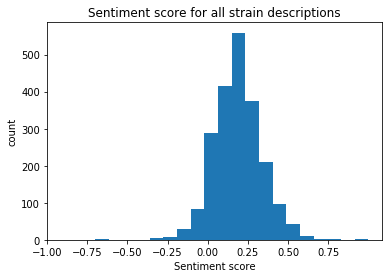

In [47]:
# Graph sentiment for each strain description

plt.figure()
plt.hist(x=sent, bins=20)
plt.xticks(ticks = np.arange(-1,1,0.25))
plt.xlabel(xlabel="Sentiment score")
plt.ylabel(ylabel="count")
plt.title("Sentiment score for all strain descriptions")
plt.show();

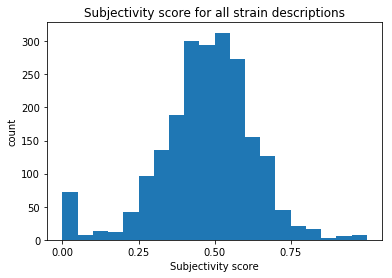

In [48]:
# Graph subjectivity for each strain description

plt.figure()
plt.hist(x=subj, bins=20)
plt.xticks(ticks = np.arange(0,1,0.25))
plt.xlabel(xlabel="Subjectivity score")
plt.ylabel(ylabel="count")
plt.title("Subjectivity score for all strain descriptions")
plt.show();

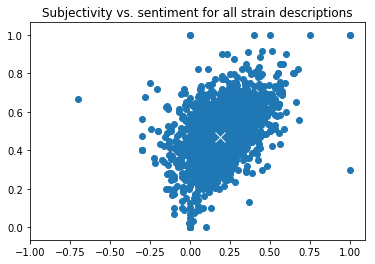

In [49]:
# Plot subjectivity vs sentiment

plt.figure()
plt.scatter(x=sent, y=subj)
plt.plot([0.19], [0.47], marker='x', markersize=10, color="white") # MEAN SENTIMENT, SUBJECTIVITY
plt.xticks(ticks = np.arange(-1,1.01,0.25), label="Sentiment score")
plt.yticks(ticks = np.arange(0,1.01,0.2), label="Subjectivity score")
plt.title("Subjectivity vs. sentiment for all strain descriptions")
plt.show();

#### Let's now check the lowest- and highest-valued sentiment descriptions to see how well TextBlob does at sentiment analysis (i.e. are our results actually meaningful?)

In [51]:
df.sort_values(by="Sentiment", inplace=True)
df.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Strain,Cluster,Lean,Rating,Strain_type,Strain_description,Sentiment,Subjectivity
Strain,,,,,,,,
Cherry Skunk,Cherry Skunk,1,0.57,4.391304,hybrid,Cherry Skunk is an indica-dominant hybrid that...,-0.7000,0.6667
Afternoon Delight,Afternoon Delight,0,0.56,4.640000,hybrid,"Afternoon Delight, created by Colorado Seed In...",-0.3019,0.5630
Tina Danza,Tina Danza,1,0.55,4.625000,hybrid,"From Swamp Boys Seeds comes Tina Danza, a hybr...",-0.3000,0.4000
Training Day,Training Day,1,0.90,4.518519,indica,"Bred by DNA Genetics, Training Day is a 70% in...",-0.3000,0.4750
Star Master Kush,Star Master Kush,0,0.77,4.736842,indica,Star Master Kush is an indica-dominant hybrid ...,-0.3000,0.4000


In [64]:
description_low = TextBlob(df.iloc[0]['Strain_description'])
description_high = TextBlob(df.iloc[-1]['Strain_description'])

In [68]:
# SENTIMENTS BY SENTENCE (LOWEST)
sentence_polarity = [str(round(description_low.sentences[i].sentiment[0],2)) for i in range(len(description_low.sentences))]

print("Polarity [-1:1]")
print("-"*len("Sentence Polarity"))
for i, sentence in enumerate(description_low.sentences):
    print(f"{sentence_polarity[i]} - {sentence}")

Polarity [-1:1]
-----------------
0.0 - Cherry Skunk is an indica-dominant hybrid that combines genetics from Skunk Dawg and Poppa Cherry.
-0.7 - Blissful, euphoric effects settle in to help dissolve stress and bad moods, while its calming qualities encourage rest and relaxation.
0.0 - This strain also provides a burst of cerebral energy and expands the mind to feed creativity and introspection.


In [69]:
# SENTIMENTS BY SENTENCE (HIGHEST)
sentence_polarity = [str(round(description_high.sentences[i].sentiment[0],2)) for i in range(len(description_high.sentences))]

print("Polarity [-1:1]")
print("-"*len("Sentence Polarity"))
for i, sentence in enumerate(description_high.sentences):
    print(f"{sentence_polarity[i]} - {sentence}")

Polarity [-1:1]
-----------------
1.0 - Bettie Page, grown by Liberty Reach Farms in Washington, is a perfectly balanced 50/50 hybrid cannabis strain.
0.0 - This high-THC strain provides mellow euphoria that focuses itself in the cerebral space, encouraging energy rather than lethargy.


#### It looks like TextBlob has some issues... the "lowest" and "highest" sentiments aren't that different from each other and neither seems particularly good/bad.

#### Let's move on to using Vader. Perhaps this yield more fruitful results.

## 2. Vader
- See SpaCy notebook - Extending SpaCy
- towardsdatascience.com/sentiment-analysis-beyond-words-6ca17a6c1b54

In [70]:
# Load df if needed
df = pd.read_csv('df_sentiment_analysis.csv')

In [72]:
# create sentiment analyzer object
analyzer = SentimentIntensityAnalyzer()

In [73]:
# Sample sentiment analysis on description
description = df['Strain_description'][2]
print(description, '\n')
print(analyzer.polarity_scores(description))

1024 is a sativa-dominant hybrid bred in Spain by Medical Seeds Co. The breeders claim to guard the secret genetics due to security reasons, but regardless of its genetic heritage, 1024 is a THC powerhouse with a sweet and spicy bouquet. Subtle fruit flavors mix with an herbal musk to produce uplifting sativa effects. One specific phenotype is noted for having a pungent odor that fills a room, similar to burning incense. 

{'neg': 0.0, 'neu': 0.919, 'pos': 0.081, 'compound': 0.6908}


#### Sample sentiment for TextBlob's lowest, highest sentiment (for comparison)

In [87]:
df.sort_values(by="Sentiment", inplace=True)

description_low = df.iloc[0]['Strain_description']
description_high = df.iloc[-1]['Strain_description']

print(f"Vader sentiment for lowest TextBlob sentiment (-0.7): {analyzer.polarity_scores(description_low)}")
print(f"Vader sentiment for highest TextBlob sentiment (1.0): {analyzer.polarity_scores(description_high)}")

Vader sentiment for lowest TextBlob sentiment (-0.7): {'neg': 0.102, 'neu': 0.542, 'pos': 0.356, 'compound': 0.9571}
Vader sentiment for highest TextBlob sentiment (1.0): {'neg': 0.099, 'neu': 0.518, 'pos': 0.383, 'compound': 0.9403}


#### Vader sees no big difference between sentiments where TextBlob does. Vader seems to be more accurate, based on my reading of these strain descriptions.

In [88]:
# ADD NEW COLUMNS TO DF
df['NLP_neg'] = None
df['NLP_neu'] = None
df['NLP_pos'] = None
df['NLP_compound'] = None

In [89]:
### DO THE VADER EQUIVALENT FOR OUTPUTTING POLARITY SCORES TO THE DF

# GENERATE SENTIMENT, SUBJECTIVITY FOR EACH ROW
for row, description in enumerate(df['Strain_description']):
    print(row)
    description = str(description)
    df['NLP_neg'][row] = analyzer.polarity_scores(description)['neg']
    df['NLP_pos'][row] = analyzer.polarity_scores(description)['pos']
    df['NLP_neu'][row] = analyzer.polarity_scores(description)['neu']
    df['NLP_compound'][row] = analyzer.polarity_scores(description)['compound']
    
df.to_csv('df_sentiment_analysis_vader.csv')

0


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on 

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060


In [90]:
# LOAD df IF NEEDED
df = pd.read_csv('df_sentiment_analysis_vader.csv')

#### Let's use histograms to visualize all polarity scores

In [97]:
# CREATE ARRAYS OF POLARITY VALUES
pos = df['NLP_pos'].values
neg = df['NLP_neg'].values
neu = df['NLP_neu'].values
cmp = df['NLP_compound'].values

In [99]:
# CHECK BASIC STATS OF POLARITY VALUES
print("mean -- std -- min -- max")
print("POSITIVE")
print(f"{round(pos.mean(),2)} -- {round(pos.std(),2)} -- {round(pos.min(),2)} -- {round(pos.max(),2)}")
print("NEGATIVE")
print(f"{round(neg.mean(),2)} -- {round(neg.std(),2)} -- {round(neg.min(),2)} -- {round(neg.max(),2)}")
print("NEUTRAL")
print(f"{round(neu.mean(),2)} -- {round(neu.std(),2)} -- {round(neu.min(),2)} -- {round(neu.max(),2)}")
print("COMPOUND")
print(f"{round(cmp.mean(),2)} -- {round(cmp.std(),2)} -- {round(cmp.min(),2)} -- {round(cmp.max(),2)}")

mean -- std -- min -- max
POSITIVE
0.17 -- 0.08 -- 0.0 -- 0.51
NEGATIVE
0.06 -- 0.05 -- 0.0 -- 0.38
NEUTRAL
0.77 -- 0.09 -- 0.46 -- 1.0
COMPOUND
0.64 -- 0.44 -- -0.95 -- 1.0


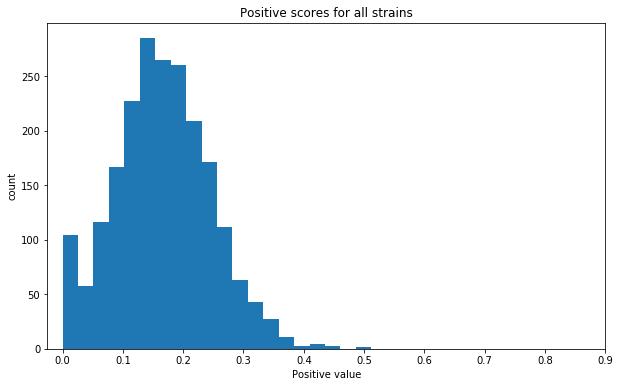

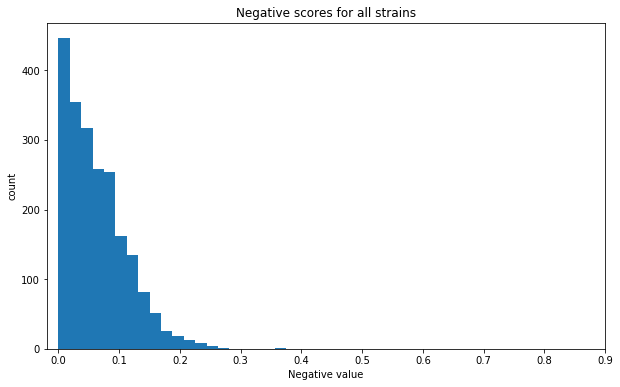

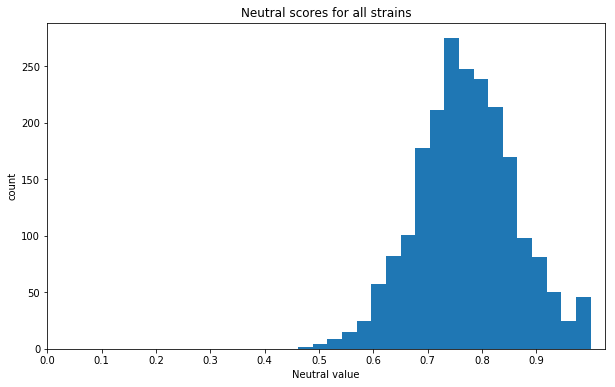

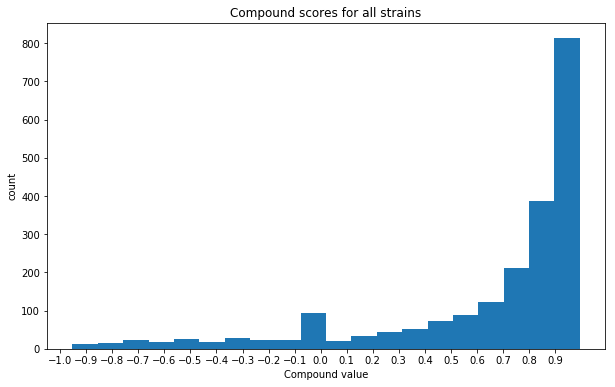

In [112]:
# PRODUCE HISTORGRAMS

# Positive Scores
plt.figure(figsize=(10,6))
plt.hist(x=pos, bins=20)
plt.xticks(ticks = np.arange(0,1,0.1))
plt.xlabel(xlabel = "Positive value")
plt.ylabel(ylabel = "count")
plt.title("Positive scores for all strains")
plt.show();

# Negative Scores
plt.figure(figsize=(10,6))
plt.hist(x=neg, bins=20)
plt.xticks(ticks = np.arange(0,1,0.1))
plt.xlabel(xlabel = "Negative value")
plt.ylabel(ylabel = "count")
plt.title("Negative scores for all strains")
plt.show();

# Neutral Scores
plt.figure(figsize=(10,6))
plt.hist(x=neu, bins=20)
plt.xticks(ticks = np.arange(0,1,0.1))
plt.xlabel(xlabel = "Neutral value")
plt.ylabel(ylabel = "count")
plt.title("Neutral scores for all strains")
plt.show();

# Compound Scores
plt.figure(figsize=(10,6))
plt.hist(x=cmp, bins=20)
plt.xticks(ticks = np.arange(-1,1,0.1))
plt.xlabel(xlabel = "Compound value")
plt.ylabel(ylabel = "count")
plt.title("Compound scores for all strains")
plt.show();


#### Let's take a look at some of strain descriptions with the lowest and highest compound scores to check the score's meaningfulness

In [121]:
# GET BOTTOM AND TOP SCORES AND STRAIN DESCRIPTIONS
df.sort_values(by="NLP_compound", inplace=True)

maxnum = 3

bottom_scores = [df.iloc[i]['NLP_compound'] for i in range (0,maxnum)]
bottom_descr = [df.iloc[i]['Strain_description'] for i in range (0,maxnum)]
top_scores = [df.iloc[-i]['NLP_compound'] for i in range (1,maxnum+1)]
top_descr = [df.iloc[-i]['Strain_description'] for i in range (1,maxnum+1)]

In [124]:
print(f"Bottom {maxnum} scores:")
for i in range(0,maxnum):
    print(bottom_scores[i])
    print(bottom_descr[i], "\n")
    
print(f"Top {maxnum} scores:")
for i in range(0,maxnum):
    print(top_scores[i])
    print(top_descr[i], "\n")

Bottom 3 scores:
-0.9531
Allkush, 2nd prize winner at the 2005 Highlife Cannabis Cup, is a hashy Kush blend bred by Paradise Seeds of Amsterdam. This resinous flower hails from the  Hippie Trail  that winds through Pakistan and Afghanistan, creating a 75/25 indica-dominant strain that soothes without binding the consumer to the couch. With traditional uplifting cerebral elements and a pleasant sedation on the body, Allkush shines on patients seeking relief from sleep disorders, anxiety, and depression. 

-0.9274
LA Woman is a match of two multi-award winning strains by DNA Genetics, Martian Mean Green and LA Confidential. This strain's taste is sweet and robust with the flavor lasting well after the exhale. It's hard to go wrong with LA Woman's incredible smell and potency. This strain has frosty buds and is definitely a crowd-pleaser. 

-0.9121
Afghan Widow is a strain with deep relaxing qualities that immediately envelop the body in a calming aura. This mid-level sedation is pleasant

#### The descriptions for the bottom scores don't seem that bad! Vader clearly isn't doing an amazing job identifying truly negative strain descriptions.

#### What if we look at negative NLP scores?

In [136]:
# SORT STRAIN DESCRIPTIONS BY HIGHEST NLP_neg SCORE, GET SCORES & DESCRIPTIONS
df.sort_values(by="NLP_neg", ascending=False, inplace=True)

most_neg_scores = [df.iloc[i]['NLP_neg'] for i in range (0,maxnum)]
most_neg_descr = [df.iloc[i]['Strain_description'] for i in range (0,maxnum)]

In [137]:
print(f"Top {maxnum} most negative scores:")
for i in range(0,maxnum):
    print(most_neg_scores[i])
    print(most_neg_descr[i], "\n")

Top 3 most negative scores:
0.375
Birthday Cake Kush, also known as Wedding Cake or just Birthday Cake, is an indica-dominant hybrid with strong body effects and sweet cake-like flavor. As decadent as its Girl Scout Cookies and Cherry Pie parent strains, Birthday Cake Kush buds bloom with a crystalline icing of THC-rich resin. Like any dessert, Birthday Cake Kush is the perfect way to end your day, with deeply relaxing effects that soothe the body without sedating the mind. This indica is preferred by patients treating pain, anxiety, appetite loss, inflammation, and headaches. 

0.27699999999999997
Alien Bubba is the intergalactic cross of the renowned Bubba Kush and the heady space invader, Alien Kush. This two-fold Kush blend offers mellow sedation with a mental aura most would describe as introspective or meditative. Its bouquet is earthy and floral, and when combusted, Alien Bubba shows off a pungent tea and herbaceous grassiness that is smooth on the exhale. Enjoy this heady heavy

#### As with NLP_compound, our strongest NLP_neg scores don't reflect particularly negative reviews!

#### From this it looks like our Vader polarity scores might not be that applicable to strain descriptions.

# CONCLUSIONS:

### Neither TextBlob nor Vader seem particularly well-suited to evaluate strain descriptions.  I suspect this is in part because "negative" medical terms (e.g. "headache, pain") are included in those descriptions, if only to describe how strains alleviate these symptoms.

### Perhaps better strain reviews would be better suited to this sort of analysis.

### 3. Naive Bayes

## Compare models: Logistic, KNN, DTree (no hyper-parameter optimization)

In [141]:
# Logistic regression instantiate, fit
logreg_model = linear_model.LogisticRegression()
logreg_model.fit(X_train, y_train)

# Logistic regression predict, evaluate
print(f"Logistic regression score (train): {logreg_model.score(X_train, y_train)*100}")
print(f"Logistic regression score (test): {logreg_model.score(X_test, y_test)*100}")


# KNN instantiate, fit
KNN_model = neighbors.KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

# KNN predict, evaluate
print(f"KNN score (train): {KNN_model.score(X_train, y_train)*100}")
print(f"KNN score (test): {KNN_model.score(X_test, y_test)*100}")


# Multi-class SVM
svm_model = svm.SVC(decision_function_shape='ovo') # multi-class so use ovo
svm_model.fit(X, Y) 
print(f"SVM score (train): {svm_model.score(X_train, y_train)*100}")
print(f"SVM score (test): {svm_model.score(X_test, y_test)*100}")


# Decision tree instantiate, fit
max_depth = 5
DT_model = tree.DecisionTreeClassifier(max_depth=max_depth)
DT_model.fit(X_train, y_train)

# Decision tree predict, evaluate
print(f"Decision tree score (train): {DT_model.score(X_train, y_train)*100}")
print(f"Decision tree score (test): {DT_model.score(X_test, y_test)*100}")

NameError: name 'X_train' is not defined

In [ ]:
# SCALING CODE (IF NEEDED)
# from sklearn.preprocessing import StandardScaler
# Scale our data - fit to X_train - UNNECESSARY
# scaler = StandardScaler()
# scaler.fit(X_train)
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)


In [ ]:
# # RANDOM FOREST FUNCTION - ITERATES OVER MAX_DEPTH

# def RF_iterate(X, y, max_depth, n_trees):

#     split = 0.3
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split, stratify=y, random_state=42)

#     RF_train_scores = []
#     RF_test_scores = []

#     # Iterate over all trees from 1 to n_trees
#     for i in range(1,n_trees+1):
#         RF_model = RandomForestClassifier(n_estimators=n_trees, max_depth=max_depth,\
#                                           class_weight='balanced')
#         RF_model.fit(X_train, y_train)

#         RF_train_scores.append(RF_model.score(X_train, y_train)*100)
#         RF_test_scores.append(RF_model.score(X_test, y_test)*100)
        
#     plt.figure()
#     plt.plot(np.arange(1,n_trees+1), RF_train_scores, label="Train scores", c='red')
#     plt.plot(np.arange(1,n_trees+1), RF_test_scores, label="Train scores", c='green')
#     plt.xlabel("Estimators (trees)")
#     plt.ylabel("Accuracy score")
#     plt.title("Accuracy scores for Random Forest model")
#     plt.legend()
#     plt.show()
    
#     return(RF_model, RF_train_scores, RF_test_scores)